In [1]:
# predicting will the driver come on the podium or not ie in the top 3 given the feature from the the csv files from kaggle 
#Using algorithms like deep learing feed feedforward, backpropagation, random forests and feasture selection usign lasso .

#I am trying to add the qualifying race time laps as the feature that their fastest lap there
# But i am finding that the number of features are less even after adding that

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

main = pd.read_csv('Data/results.csv', encoding="ANSI")
circuits = pd.read_csv('Data/circuits.csv', encoding="ANSI")

constructors = pd.read_csv('Data/constructors.csv', encoding="ANSI")

drivers = pd.read_csv('Data/drivers.csv', encoding="ANSI")
qualifying = pd.read_csv('Data/qualifying.csv', encoding="ANSI").dropna()
races = pd.read_csv('Data/races.csv', encoding="ANSI")

main.drop('position', axis=1, inplace=True)
main.drop('positionText', axis=1, inplace=True)
main.drop('points', axis=1, inplace=True)
main.drop('laps', axis=1, inplace=True)
main.drop('time', axis=1, inplace=True)
main.drop('milliseconds', axis=1, inplace=True)
main.drop('fastestLap', axis=1, inplace=True)
main.drop('rank', axis=1, inplace=True)
main.drop('fastestLapTime', axis=1, inplace=True)
main.drop('fastestLapSpeed', axis=1, inplace=True)
main.drop('statusId', axis=1, inplace=True)

drivers = drivers[['driverId','nationality']]
races = races[['raceId','circuitId','year']]
circuits = circuits[['circuitId','lat','lng']]
main.dropna(axis=0, inplace=True)



timemilliseconds = []
time = qualifying['fastest time'].str.split(':')
for item in time:
     timemilliseconds.append((int(item[0])*60000 + float(item[1])*1000))

qualifying['time'] = timemilliseconds
print(qualifying.dtypes)
print(qualifying.head())

qualifyId          int64
raceId             int64
driverId           int64
constructorId      int64
number             int64
position           int64
q1                object
q2                object
q3                object
fastest time      object
time             float64
dtype: object
   qualifyId  raceId  driverId  constructorId  number  position       q1  \
0          1      18         1              1      22         1  01:26.6   
1          2      18         9              2       4         2  01:26.1   
2          3      18         5              1      23         3  01:25.7   
3          4      18        13              6       2         4  01:26.0   
4          5      18         2              2       3         5  01:26.0   

        q2       q3 fastest time     time  
0  01:25.2  01:26.7      01:25.2  85200.0  
1  01:25.3  01:26.9      01:25.3  85300.0  
2  01:25.5  01:27.1      01:25.5  85500.0  
3  01:25.7  01:27.2      01:25.7  85700.0  
4  01:25.5  01:27.2      01:25.5  

In [3]:
# merging drivers csv file
main = pd.merge(main,drivers,on='driverId')
main = pd.DataFrame(main)
print(main.dtypes)


resultId           int64
raceId             int64
driverId           int64
constructorId      int64
number           float64
grid               int64
positionOrder      int64
nationality       object
dtype: object


In [4]:
# merging races.csv file
main = pd.merge(main,races,on='raceId')
main = pd.DataFrame(main)
print(main.dtypes)

resultId           int64
raceId             int64
driverId           int64
constructorId      int64
number           float64
grid               int64
positionOrder      int64
nationality       object
circuitId          int64
year               int64
dtype: object


In [5]:
# merging circuits.csv file
main = pd.merge(main,circuits,on='circuitId')
main = pd.DataFrame(main)
print(main.dtypes)


resultId           int64
raceId             int64
driverId           int64
constructorId      int64
number           float64
grid               int64
positionOrder      int64
nationality       object
circuitId          int64
year               int64
lat              float64
lng              float64
dtype: object


In [6]:
pod = []
for position in main['positionOrder']:
        pod.append(position<4)

main['podium'] = pod

print(main.dtypes)


resultId           int64
raceId             int64
driverId           int64
constructorId      int64
number           float64
grid               int64
positionOrder      int64
nationality       object
circuitId          int64
year               int64
lat              float64
lng              float64
podium              bool
dtype: object


In [7]:

#df = pd.concat([df, pd.get_dummies(df['YEAR'])], axis=1);
main = pd.concat([main,pd.get_dummies(main['nationality'])],axis=1)
print(main.head())



   resultId  raceId  driverId  constructorId  number  grid  positionOrder  \
0         1      18         1              1    22.0     1              1   
1         2      18         2              2     3.0     5              2   
2         3      18         3              3     7.0     7              3   
3         4      18         4              4     5.0    11              4   
4         5      18         5              1    23.0     3              5   

  nationality  circuitId  year     ...      Portuguese  Rhodesian  Russian  \
0     British          1  2008     ...               0          0        0   
1      German          1  2008     ...               0          0        0   
2      German          1  2008     ...               0          0        0   
3     Spanish          1  2008     ...               0          0        0   
4     Finnish          1  2008     ...               0          0        0   

   South African  Spanish  Swedish  Swiss  Thai  Uruguayan  Venezuel

In [8]:
print(main.dtypes)

resultId               int64
raceId                 int64
driverId               int64
constructorId          int64
number               float64
grid                   int64
positionOrder          int64
nationality           object
circuitId              int64
year                   int64
lat                  float64
lng                  float64
podium                  bool
American               uint8
American-Italian       uint8
Argentine              uint8
Argentine-Italian      uint8
Australian             uint8
Austrian               uint8
Belgian                uint8
Brazilian              uint8
British                uint8
Canadian               uint8
Chilean                uint8
Colombian              uint8
Czech                  uint8
Danish                 uint8
Dutch                  uint8
East German            uint8
Finnish                uint8
French                 uint8
German                 uint8
Hungarian              uint8
Indian                 uint8
Indonesian    

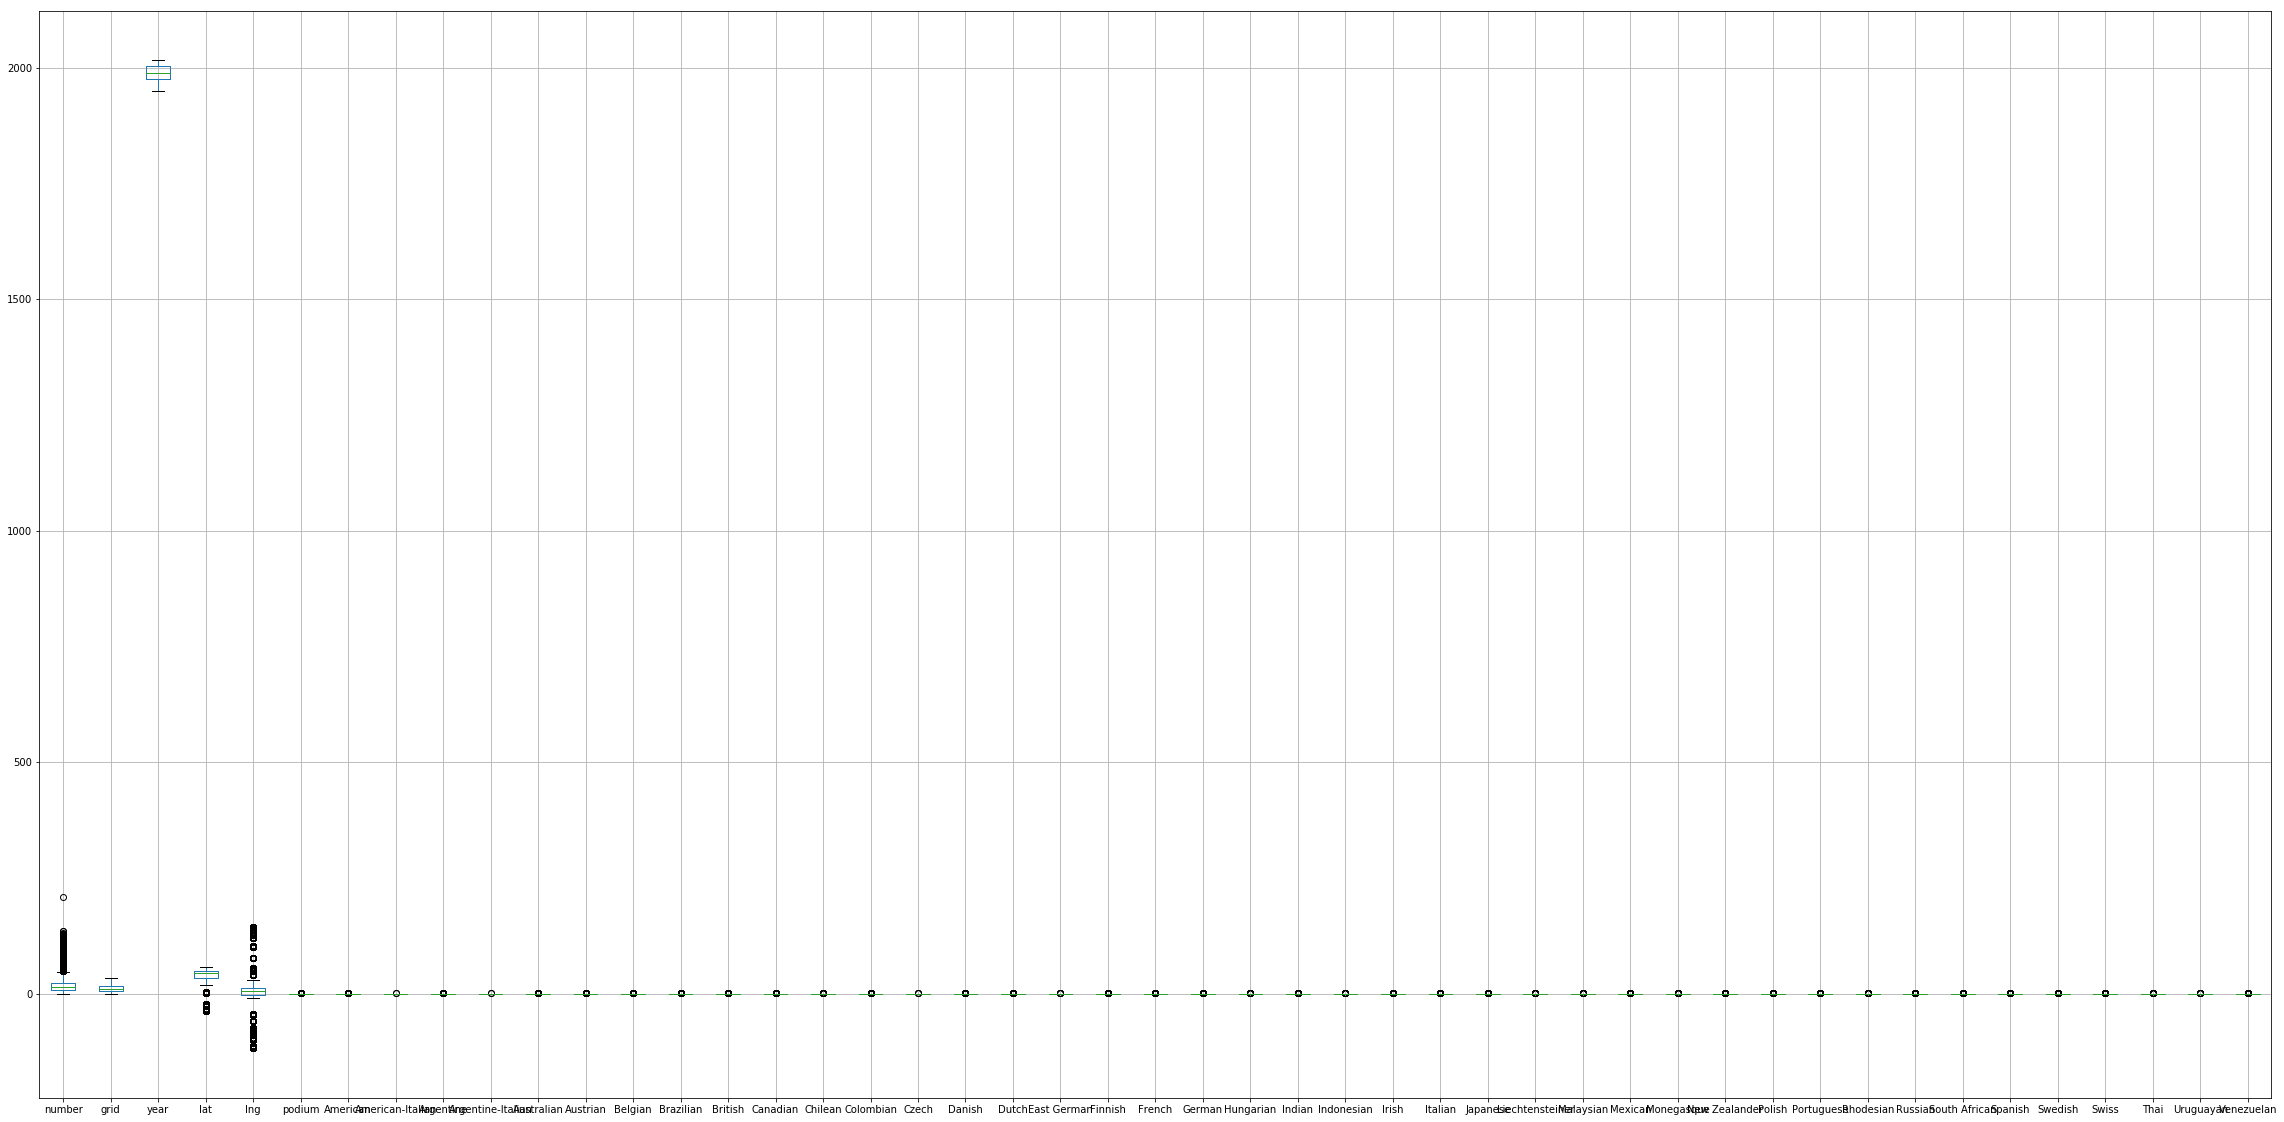

In [9]:
main.dropna()

X = main.drop(['resultId','raceId','driverId','constructorId','positionOrder','nationality','circuitId'], axis=1)
Y = main['podium']

X.boxplot(figsize=(40,20))


In [18]:
time = []
for index, row in main.iterrows():
    qualrow = qualifying[(qualifying.raceId == row.raceId) & (qualifying.driverId == row.driverId)]
    if len(qualrow)<1:
        time.append(1000000)
    else:
        time.append(float(qualrow.time))

print(len(time))

main['qualifying_time'] = time




23771


In [20]:
print(main.head())

   resultId  raceId  driverId  constructorId  number  grid  positionOrder  \
0         1      18         1              1    22.0     1              1   
1         2      18         2              2     3.0     5              2   
2         3      18         3              3     7.0     7              3   
3         4      18         4              4     5.0    11              4   
4         5      18         5              1    23.0     3              5   

  nationality  circuitId  year       ...         Rhodesian  Russian  \
0     British          1  2008       ...                 0        0   
1      German          1  2008       ...                 0        0   
2      German          1  2008       ...                 0        0   
3     Spanish          1  2008       ...                 0        0   
4     Finnish          1  2008       ...                 0        0   

   South African  Spanish  Swedish  Swiss  Thai  Uruguayan  Venezuelan  \
0              0        0        0  

In [21]:
main.sort_values(by=['year'])
print(main.head())

   resultId  raceId  driverId  constructorId  number  grid  positionOrder  \
0         1      18         1              1    22.0     1              1   
1         2      18         2              2     3.0     5              2   
2         3      18         3              3     7.0     7              3   
3         4      18         4              4     5.0    11              4   
4         5      18         5              1    23.0     3              5   

  nationality  circuitId  year       ...         Rhodesian  Russian  \
0     British          1  2008       ...                 0        0   
1      German          1  2008       ...                 0        0   
2      German          1  2008       ...                 0        0   
3     Spanish          1  2008       ...                 0        0   
4     Finnish          1  2008       ...                 0        0   

   South African  Spanish  Swedish  Swiss  Thai  Uruguayan  Venezuelan  \
0              0        0        0  

In [22]:
main.to_csv('final.csv',encoding='ANSI')

In [23]:
print(main.qualifying_time.iloc[9])

86200.0
